In [72]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

NUM = 100

In [87]:
df = pd.DataFrame({'time':range(NUM),'value':[random.gauss(10,0.5) for x in range(NUM)]})

<AxesSubplot:xlabel='time', ylabel='value'>

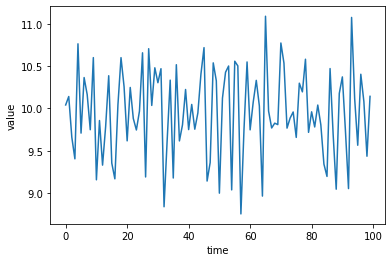

In [88]:
sns.lineplot(data=df, x='time', y='value')

<AxesSubplot:xlabel='time', ylabel='value'>

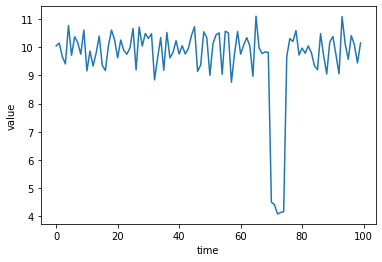

In [89]:
_ = df.copy()
_.iloc[70:75]['value'] *= random.random()
sns.lineplot(data=_, x='time', y='value')

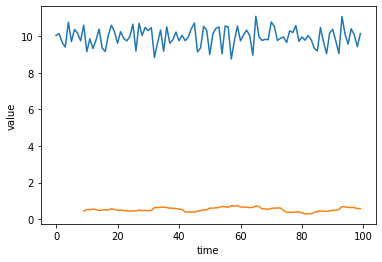

In [90]:
std = df['value'].rolling(window=10).std()

sns.lineplot(data=df, x='time', y='value')
plt.plot(std)

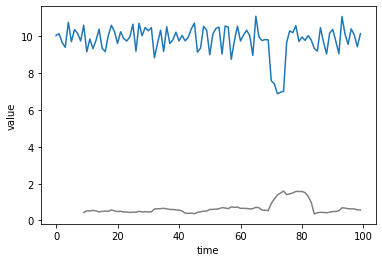

In [91]:
_ = df.copy()
_.iloc[70:75]['value'] *= random.random()
std = _['value'].rolling(window=10).std()

sns.lineplot(data=_, x='time', y='value')
plt.plot(std,color='gray')

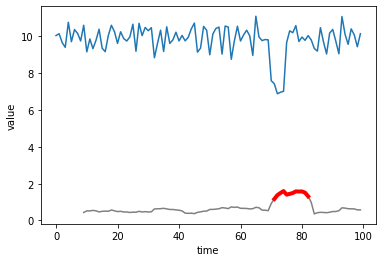

In [92]:
sns.lineplot(data=_, x='time', y='value')
plt.plot(std, color='gray')
plt.plot(std[std.values > 1], color='red',lw=4)

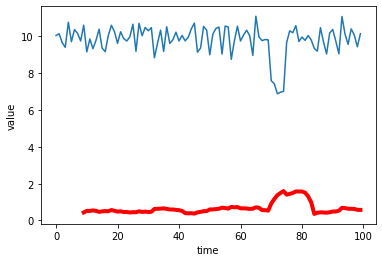

In [100]:
sns.lineplot(data=_, x='time', y='value')
plt.plot(std, color='gray')
plt.plot(std[std.values > 0.1], color='red',lw=4)

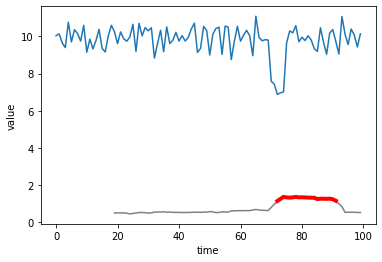

In [105]:
std = _['value'].rolling(window=20).std()
sns.lineplot(data=_, x='time', y='value')
plt.plot(std, color='gray')
plt.plot(std[std.values > 1], color='red',lw=4)

In [132]:
_ = df.copy()
_.iloc[0:100:40]['value'] *= 1.3
_.iloc[1:100:40]['value'] *= 0.7


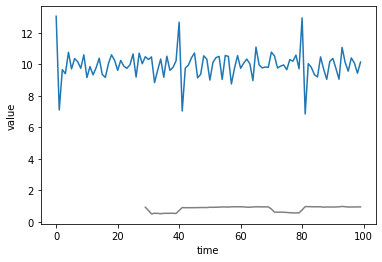

In [133]:
std = _['value'].rolling(window=30).std()
sns.lineplot(data=_, x='time', y='value')
plt.plot(std, color='gray')
plt.plot(std[std.values > 1], color='red',lw=4)

<AxesSubplot:xlabel='x', ylabel='y'>

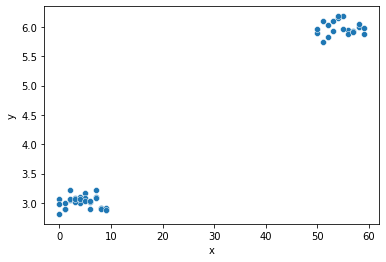

In [144]:
df_one_c_svm = pd.DataFrame({'x':range(10),'y':[random.gauss(3,0.1) for x in range(10)]})

_ = pd.DataFrame({'x':range(10),'y':[random.gauss(3,0.1) for x in range(10)]})
df_one_c_svm = df_one_c_svm.append(_)

_ = pd.DataFrame({'x':range(10),'y':[random.gauss(3,0.1) for x in range(10)]})
df_one_c_svm = df_one_c_svm.append(_)

_ = pd.DataFrame({'x':range(50,60),'y':[random.gauss(6,0.1) for x in range(10)]})
df_one_c_svm = df_one_c_svm.append(_)

_ = pd.DataFrame({'x':range(50,60),'y':[random.gauss(6,0.1) for x in range(10)]})
df_one_c_svm = df_one_c_svm.append(_)

_

sns.scatterplot(data=df_one_c_svm,x='x',y='y')

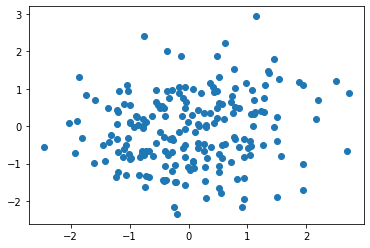

In [294]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random


x, _ = make_blobs(n_samples=200, centers=10, cluster_std=1, center_box=(0,0))

plt.scatter(x[:,0], x[:,1])
plt.show()

In [295]:
svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
svm.fit(x)
pred = svm.predict(x)
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

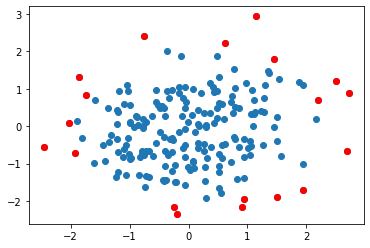

In [296]:
anomalies = x[where(pred==-1)]
plt.scatter(x[:,0], x[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], color='r')
plt.show()

In [297]:
pred = svm.fit_predict(x)
scores = svm.score_samples(x)

In [298]:
thresh = quantile(scores, 0.3)
scores

array([ 9.28657979, 11.19870037, 10.92812356,  9.45221671, 11.32188518,
       10.7823141 ,  9.78864477, 10.02332143, 10.95149217,  8.88544355,
       10.4489734 , 10.90697839, 10.97778715,  8.54583411,  8.84798237,
       10.99658085,  9.93720267, 10.82305905,  9.99561281, 11.29846443,
       10.89370964,  9.36381587, 10.52126248, 10.60320848, 10.90954318,
       10.5868198 , 10.75309111,  8.55722858, 11.04065128, 11.14152053,
        8.19685185, 10.7379827 , 10.25970917, 10.2129151 , 11.17370758,
       11.09242933,  9.60141878, 10.68106619,  9.71340528, 10.1834783 ,
       10.76093303, 11.13736367,  9.26300303, 11.35323661,  9.6416031 ,
       10.63135445, 10.91927053, 10.63310197,  9.98632889, 10.34749809,
       10.97862296,  9.92144841,  8.20738932, 11.33312734, 10.73629479,
       10.13644627, 11.35315336, 10.02757817, 11.16916086, 11.30035478,
       10.54665708, 10.09624637,  9.71238357,  7.27363156, 11.37979698,
        9.4138035 , 10.52211439, 10.58991504, 11.04081487, 10.20

In [299]:
index = where(scores<=thresh)
values = x[index]

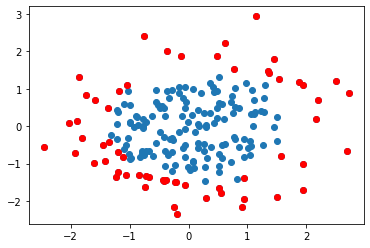

In [300]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()